In [20]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas import tseries
from pandas_datareader import data as pdr

## Loop Data

In [137]:
def get(tickers, startdate, enddate):
    def data(ticker):
        return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
    datas = map (data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['VWDRY', 'PEGI', 'QCLN', '^GSPC','DUK','NRG']
all_data = get(tickers, datetime.datetime(2010, 1, 1), datetime.datetime(2019, 10, 31))
all_data.head()

High        Low       Open      Close    Volume  \
Ticker Date                                                               
VWDRY  2010-01-04  21.469999  21.000000  21.000000  21.330000   99400.0   
       2010-01-05  20.920000  20.580000  20.920000  20.600000   69000.0   
       2010-01-06  20.700001  20.320000  20.580000  20.500000  246600.0   
       2010-01-07  20.610001  20.379999  20.500000  20.530001   76500.0   
       2010-01-08  20.500000  20.250000  20.459999  20.480000  226200.0   

                   Adj Close  
Ticker Date                   
VWDRY  2010-01-04  19.703655  
       2010-01-05  19.029314  
       2010-01-06  18.936939  
       2010-01-07  18.964653  
       2010-01-08  18.918465

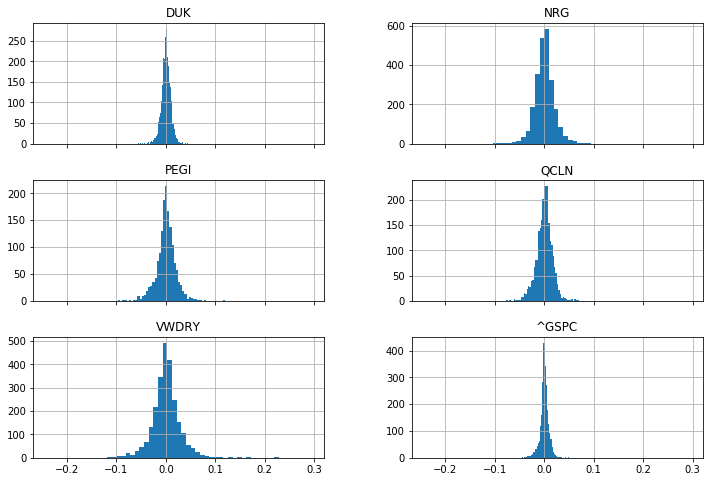

In [138]:
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

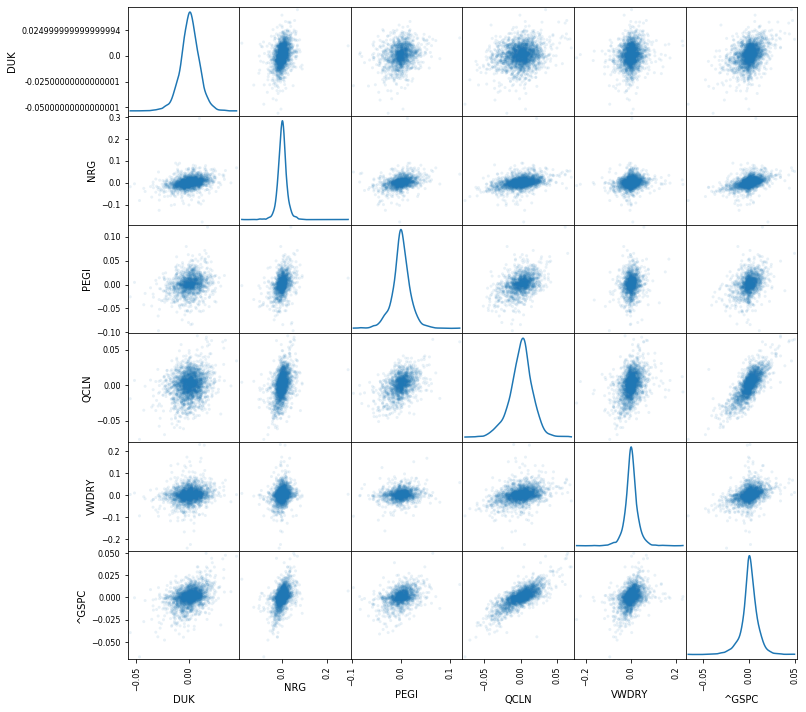

In [139]:
# Plot a scatter matrix with the `daily_pct_change` data 
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()

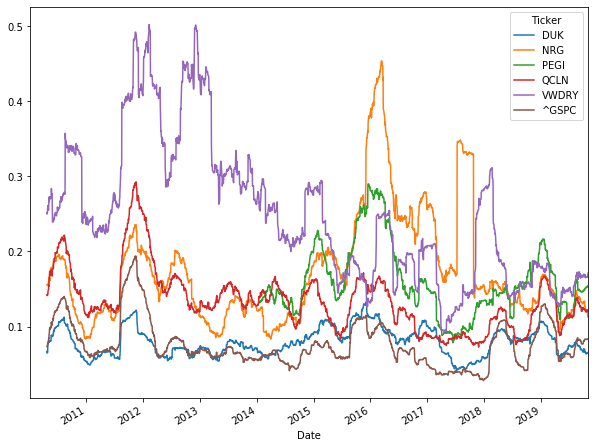

In [140]:
# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

In [141]:
# Isolate the adjusted closing prices 
adj_close_px = green['Adj Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
moving_avg[-10:]

Date
2019-10-21    21.385438
2019-10-22    21.400928
2019-10-23    21.418146
2019-10-24    21.444136
2019-10-25    21.467160
2019-10-28    21.494442
2019-10-29    21.528173
2019-10-30    21.543952
2019-10-31    21.553780
2019-11-01    21.569106
Name: Adj Close, dtype: float64

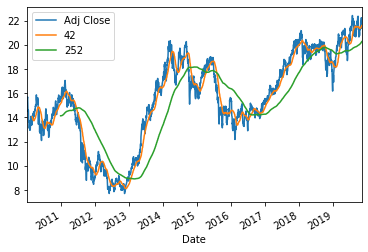

In [142]:
# Short moving window rolling mean
green['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
green['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
green[['Adj Close', '42', '252']].plot()

plt.show()

In [146]:
# Isolate the adjusted closing price
all_adj_close = all_data[['Adj Close']]

# Calculate the returns 
all_returns = np.log(all_adj_close / all_adj_close.shift(1))

# Isolate the QCLN returns 
green_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'QCLN']
green_returns.index = green_returns.index.droplevel('Ticker')

# Isolate the FSLR returns 
WIND_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'VWDRY']
WIND_returns.index = WIND_returns.index.droplevel('Ticker')

# Isolate the PEGI returns 
PEGI_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'PEGI']
PEGI_returns.index = PEGI_returns.index.droplevel('Ticker')

# Isolate the PEGI returns 
NRG_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'NRG']
NRG_returns.index = NRG_returns.index.droplevel('Ticker')

# Isolate the PEGI returns 
DUK_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'DUK']
DUK_returns.index = DUK_returns.index.droplevel('Ticker')

# Isolate the GSPC returns
sp_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == '^GSPC']
sp_returns.index = sp_returns.index.droplevel('Ticker')
sp_returns.head()


,Adj Close
Date,
2010-01-04,3.937490
2010-01-05,0.003111
2010-01-06,0.000545
2010-01-07,0.003993
2010-01-08,0.002878


In [147]:
# Build up a new DataFrame with QCLN and S&P returns
return_data = pd.concat([green_returns, sp_returns,PEGI_returns,WIND_returns,NRG_returns,DUK_returns], axis=1)[1:]
return_data.columns = ['^GSPC', 'QCLN','PEGI','VWDRY','NRG','DUK']
return_data

,^GSPC,QCLN,PEGI,VWDRY,NRG,DUK
Date,,,,,,
2010-01-05,0.015175,0.003111,NaN,-0.034824,0.015382,-0.016638
2010-01-06,0.005407,0.000545,NaN,-0.004866,0.021629,0.003589
2010-01-07,0.000000,0.003993,NaN,0.001462,0.005636,0.004765
2010-01-08,-0.002399,0.002878,NaN,-0.002438,-0.016596,0.000594
2010-01-11,0.007778,0.001745,NaN,0.041603,0.009344,0.010044
...,...,...,...,...,...,...
2019-10-28,0.010400,0.005566,-0.017822,0.011412,-0.010593,-0.014035
2019-10-29,-0.005865,-0.000833,0.017101,-0.020337,0.003214,-0.006076
2019-10-30,-0.015964,0.003248,0.020001,0.023991,0.005907,0.005119


In [148]:
# Add a constant 
X = sm.add_constant(return_data['^GSPC'])

# Construct the model
model = sm.OLS(return_data['QCLN'],X).fit()

C:\Users\rhaws\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [149]:
# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   QCLN   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     3539.
Date:                Thu, 21 Nov 2019   Prob (F-statistic):               0.00
Time:                        06:29:49   Log-Likelihood:                 9144.7
No. Observations:                2475   AIC:                        -1.829e+04
Df Residuals:                    2473   BIC:                        -1.827e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      2.780      0.0

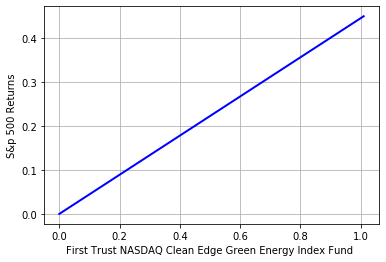

In [150]:
# plt.plot(return_data['QCLN'], return_data['^GSPC'], 'r.')
# plt.plot(return_data['FSLR'], return_data['^GSPC'], 'g.')
# plt.plot(return_data['PEGI'], return_data['^GSPC'], 'y.')
# plt.plot(return_data['QCLN'], return_data['^GSPC'], 'o.')

ax = plt.axis()
x = np.linspace(ax[0], ax[1] + 0.01)

plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=2)

plt.grid(True)
plt.axis('tight')
plt.xlabel('First Trust NASDAQ Clean Edge Green Energy Index Fund ')
plt.ylabel('S&p 500 Returns')

plt.show()

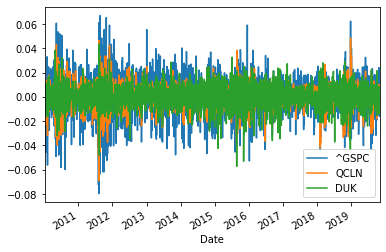

In [152]:
SP = return_data['^GSPC']
Green_Index = return_data['QCLN']
PEGI = return_data['PEGI']
DUK = return_data['DUK']
NRG = return_data['NRG']
WIND = return_data['VWDRY']
SP.plot()
Green_Index.plot()
# PEGI.plot()
DUK.plot()
# WIND.plot()

plt.legend()
plt.show()

In [153]:
# Isolate the adjusted closing price
daily_close_px.head()
list(daily_close_px)

['DUK', 'NRG', 'PEGI', 'QCLN', 'VWDRY', '^GSPC']

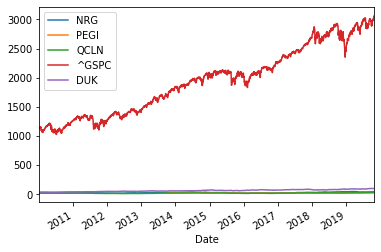

In [154]:
NRG_daily = daily_close_px['NRG']
PEGI_daily = daily_close_px['PEGI']
QCLN_daily = daily_close_px['QCLN']
SP_daily = daily_close_px['^GSPC']
DUK_daily = daily_close_px['DUK']

stk = [NRG_daily, PEGI_daily, QCLN_daily,SP_daily,DUK_daily]

for t in stk:
    t.plot()
plt.legend()
plt.show()

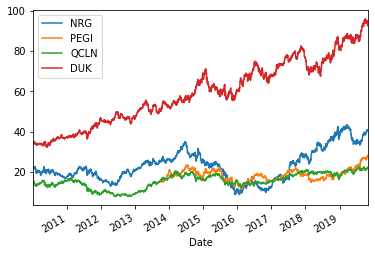

In [156]:
stk_2 = [NRG_daily, PEGI_daily, QCLN_daily,DUK_daily]

for t in stk_2:
    t.plot()
plt.legend()
plt.show()

In [157]:
for t in stk:

# Get the number of days for each security
    days = (t.index[-1] - t.index[0]).days

# Calculate the CAGR 
    cagr = ((((t[-1]) / t[1])) ** (365.0/days)) - 1

# Print CAGR
    print(cagr)

0.06568920814166801
nan
0.03658209525046474
0.10626040207608756
0.10765378807727277


In [ ]:
# redo cagr for last 5 years instead of 10